In [61]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity


In [62]:
nltk.download('stopwords')
doc = [
    "I es un campo en rápido avance que implica el desarrollo de máquinas inteligentes.",
    "El aprendizaje automático es un subconjunto de la IA que se centra en la capacitación de máquinas para aprender de los datos.",
    "El aprendizaje profundo es un subcampo del aprendizaje automático que utiliza redes neuronales con múltiples capas.",
    "La IA se aplica en diversos sectores, como la sanidad, el transporte y el ocio.",
    "Las consideraciones éticas desempeñan un papel importante en el desarrollo de la IA.",
    "La inteligencia artificial puede revolucionar muchos aspectos de la sociedad.",
    "Los sistemas de IA, como los chatbots y los asistentes virtuales, son cada vez más comunes.",
    "El procesamiento del lenguaje natural es una rama de la IA que permite a las máquinas comprender el lenguaje humano.",
    "El objetivo de la visión por computadora es que las máquinas comprendan la información visual."
]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chapu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# preprocesamiento.
doc = [x.lower() for x in doc]

In [64]:
# parámetros
max_features = 18
min_df = 1
max_df = 3
stop_words = stopwords.words('english')

In [65]:

vectorizer = TfidfVectorizer(max_features=max_features,
                             min_df=min_df,
                             max_df=max_df,
                             stop_words=stop_words)

X = vectorizer.fit_transform(doc).toarray()


In [66]:

#? Calcular la similitud del coseno entre los documentos
cosine_similarities = cosine_similarity(X, X)

In [67]:
df_similitud = pd.DataFrame(cosine_similarities, index=[f"Doc{i+1}" for i in range(len(doc))],
                            columns=[f"Doc{i+1}" for i in range(len(doc))])

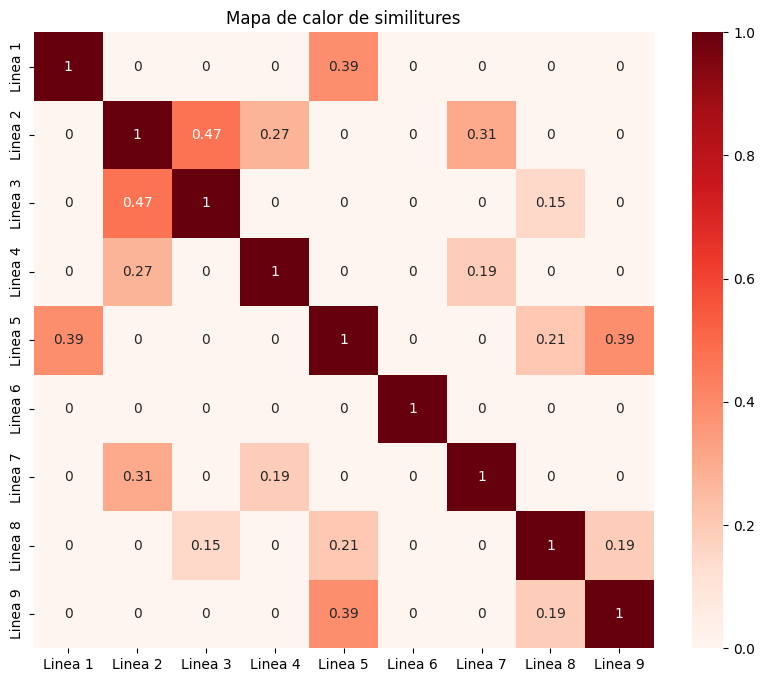

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarities, annot=True, cmap="Reds", xticklabels=[f"Linea {i+1}"
                                                                        for i in range(len(doc))], yticklabels=[f"Linea {i+1}" 
                                                                                                                for i in range(len(doc))])
plt.title("Mapa de calor de similitures")
plt.show()


In [69]:
similarcos = 1 - pairwise_distances(X ,metric='cosine')


In [70]:
np.fill_diagonal(similarcos, -1 )
similar = np.argmax(similarcos, axis=1)

for i, j in enumerate(similar):
    print(f"Documento {i + 1}, es similar al documento {j + 1} : ")
    print(f"D {i + 1} similar a -> {doc[i]}")
    print(f"D {i + 1} similar a -> {doc[j]}")

Documento 1, es similar al documento 5 : 
D 1 similar a -> i es un campo en rápido avance que implica el desarrollo de máquinas inteligentes.
D 1 similar a -> las consideraciones éticas desempeñan un papel importante en el desarrollo de la ia.
Documento 2, es similar al documento 3 : 
D 2 similar a -> el aprendizaje automático es un subconjunto de la ia que se centra en la capacitación de máquinas para aprender de los datos.
D 2 similar a -> el aprendizaje profundo es un subcampo del aprendizaje automático que utiliza redes neuronales con múltiples capas.
Documento 3, es similar al documento 2 : 
D 3 similar a -> el aprendizaje profundo es un subcampo del aprendizaje automático que utiliza redes neuronales con múltiples capas.
D 3 similar a -> el aprendizaje automático es un subconjunto de la ia que se centra en la capacitación de máquinas para aprender de los datos.
Documento 4, es similar al documento 2 : 
D 4 similar a -> la ia se aplica en diversos sectores, como la sanidad, el tra